# Linear Models

## 1. A Simple Problem
Let's start with a simple and straightforward learning problem:
 - **Given**: A training set $T = \{(1, 2), (3, 4)\}$ consisting of two pairs of numbers. Each pair has the format $(x_i, y_i)$, where $x_i \in \mathbb{R}$ is the data and $y_i \in \mathbb{R}$ is the target value. 
 - **Seek**: A linear function $y = w_1 x + w_0$ s.t. for any new data $x$, the function will output the best target value $y$ for $x$. 

In this problem, the only parameters to be determined are $w_0$ and $w_1$. As you may have learned in high school, $y = w_1 x + w_0$ is a straight line in the 2-D Euclidean plain, where $w_0$ is called the "*intercept*" of the line, and $w_1$ is called the "*slope"* of the line. What we are looking for is such a line that "*fits*" the training points the best. We will explain what "*fit*" actually means soon later. 

## 2. NBS Hands-On

Let's use *scikit-learn* to solve this learning problem, i.e. obtaining the desired values for $w_0$ and $w_1$. The linear regression model is what we need in this experiment. Please check out the following two links for more details about this model in *scikit-learn*:
1. Linear Regression model API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
2. Linear models: https://scikit-learn.org/stable/modules/linear_model.html#

**Some non-trivial Q&A:**
1. What is a "*model*" anyway?
    - From a math point of view, for example, a linear model is exactly the function expression of a line, like the one above. The model in math implies some of our beliefs about the desired function. Usually, such beliefs are called *inductive biases*. The beliefs can vary significantly up to problems, scenarios, learners' choices, and some other factors. For example, to learn a function that "fits" (sorry, I use this mysterious term again) the training data in the above problem, rather than a linear function, we may believe that a quadratic function (e.g. $y = w_2 x^2 + w_1 x + w_0$) is more appropriate. Then, this quadratic function will be our *model*, and $w_0, w_1, w_2$ are parameters to be learned.
    - From an engineering point of view (i.e. talking about code), "*model*" usually means more than a math expression with parameters. A *model* implementation typically includes the math realization, some learning algorithms to learn parameters, and some additional arguments (called *hyperparameters*) to control the behaviors of the model and/or the learning algorithms.
2. What is the difference between *learning model* and *learning algorithm*?
    - Now that the term "learning algorithm" has been mentioned, it is necessary to distinguish it from the term "model". Learning algorithms aim to obtain concrete values for parameters specified by learning models. A learning model may collaborate with different learning algorithms. 

### 2.1 Train the Linear Regression Model

In [1]:
# To handle data
import numpy as np
# To access the learning model
from sklearn import linear_model

We create an instance of the class `LinearRegression` (provided in the package `linear_model`), which is the linear regression model to be learned.

In [2]:
# Construct data structures for data (X) and target values (Y). 
# Both X and Y are NumPy ndarray. 
# Required by scikit-learn, X must be a 2-D array. Each element in this array is a data point represented by an array containing 
# all data attribute values. In our problem, the data only has one attribute. This is why each element in X is 1-dim. 
X = np.asarray([[1], [3]])
Y = np.asarray([2, 4])

In [3]:
X

array([[1],
       [3]])

In [4]:
Y

array([2, 4])

In [5]:
# Train the linear regression model.
# 'fit()' is the high-level API function call for training. When it finishes successfully, the training is done. 
lin_reg = linear_model.LinearRegression().fit(X, Y)

In [6]:
# Obtain the score of the learning quality. 1.0 is the best score, which means the learned model perfectly "fits" the training data.
# Any other scores less than 1.0, which can be negative, indicate the imperfection of fitting the training data. 
# In our case, the score is 1.0, because two points determine a line. 
lin_reg.score(X, Y)

1.0

In [7]:
# 'coef_' gives all learned parameters for "slope", i.e. all w_i except w_0, the intercept. Don't forget that if our data have more
# attributes (e.g. x_i=[x_0, x_1, X_2]), then the learning algorithm will output more learned parameters.
lin_reg.coef_

array([1.])

In [8]:
# 'intercept_' gives the learned w_0, the intercept. 
lin_reg.intercept_

1.0000000000000004

Up to this point, we have learned $w_0=1.0$ and $w_1=1.0$. And, thus, the learned straight line is $y = x + 1.0$. Now, let's figure the line as well as the training points to visually examine if the line "fits" the training data. 

In [9]:
# Create a sample for X to draw the line.
x_samples = [[I] for I in range(-10, 10, 1)]
# Obtain the values of Y corresponding to the sample of X.
y_vals = lin_reg.predict(x_samples)

In [10]:
y_vals

array([-9.00000000e+00, -8.00000000e+00, -7.00000000e+00, -6.00000000e+00,
       -5.00000000e+00, -4.00000000e+00, -3.00000000e+00, -2.00000000e+00,
       -1.00000000e+00,  6.66133815e-16,  1.00000000e+00,  2.00000000e+00,
        3.00000000e+00,  4.00000000e+00,  5.00000000e+00,  6.00000000e+00,
        7.00000000e+00,  8.00000000e+00,  9.00000000e+00,  1.00000000e+01])

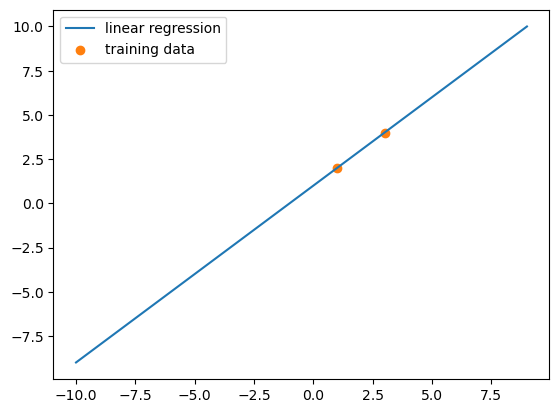

In [11]:
# To draw figures
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_samples, y_vals, label='linear regression')
ax.scatter(X.flatten(), Y, label='training data', color='tab:orange')
plt.legend()

As reasonably expected, the learned straight line perfectly "fits" the two training data points, i.e. the two points accurately fall onto the line, because two points establish a line. (Note that we have not formally explained what "fit" means, and it does not mean that ALL training points are required to fall onto the curve of the learned function.)

## 3. Pop Up the Hood of Learning

During the learning above, the empirical goal is to determine the most appropriate values of $w_0$ and $w_1$ respectively so that the straight line parameterized by $w_0$ and $w_1$ "fits" the training data. Essentially, determining the values of parameters in machine learning is an **optimization problem**. In an optimization problem, two primary topics are **objectives** (i.e. what to optimize) and **optimization algorithms** (i.e. how to optimize). 
<!-- Now that we have known the values are in the range $(- \infty, + \infty)$, then, theoretically speaking, it is a plan to go through all possible values in the range and test each value against some specific criteria to identify the ones in desire. To do so, we have to define the criteria beforehand. -->

### 3.1 Objectives

Informally, yet intuitively, the **objective** of a learning problem is a function that takes training data and possible values of desired parameters of the learning model (math-wise) as input, and outputs, typically, a real value indicating the quality of the current parameter values. The **optimization**, on the other hand, means an algorithmic procedure that seeks the parameter values maximizing or minimizing the returned value of the objective. 

The term "**fit**" means that the objective has been optimized as much as possible using the training data. Nonetheless, it's important to note that, even if the returned value of the objective couldn't be further improved in terms of the model and data in the training, the resulting model with the learned parameters may not be the optimality reflecting the true patterns of the data. 

Now, let's take a look at some typical objectives in linear regression. 

### 3.2 Least Squares in Linear Regression

**Least squares** is the most popular objective in linear regression. The motivation is to minimize the difference between $y_i$ in the training data and $\hat{y}_i$ predicted by the model. The objective is to seek a set of parameter values $\vec{\boldsymbol{w}}$ s.t. the following function is minimized:
$$
    s(\vec{\boldsymbol{w}}) = \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where the vector $\vec{\boldsymbol{w}}$ contains all parameters for the model (e.g. in our above example, $\vec{\boldsymbol{w}} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$), and $T$ is the training data set. In a more mathematical way, this objective is written as:
$$
    \DeclareMathOperator*{\argmin}{arg\,min}
    \argmin\limits_{\vec{\boldsymbol{w}}} \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where "$\argmin\limits_{\boldsymbol{\theta}} f(x;\boldsymbol{\theta})$" means "seeking parameters $\boldsymbol{\theta}$ that minimize the function $f(x; \boldsymbol{\theta})$ parameterized by $\boldsymbol{\theta}$". 

### 3.3 Optimization Algorithms

An **optimization algorithm** is a programmatic procedure determining the exact or approximate values of desired parameters of a given objective. Typically, the designs of such algorithms follow either (sometimes, both) of the two directions: **analytic** and **searching**. 

**Analytic** methods directly compute solutions, i.e. by outputting a closed form, exactly or approximately, to the problems. And, **searching** methods usually iteratively refine candidate solutions until some terminal conditions are satisfied. 

### 3.4 Solve Linear Least Squares Analytically
In our above example, it has already known that $\hat{y}_i = w_0 + w_1 x_i$, and thus the objective to be minimized is rewritten as: 
$$
    s \Big(\begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Big) = \Big(y_1 - (w_0 + w_1 x_1)\Big)^2 + \Big(y_2 - (w_0 + w_1 x_2)\Big)^2
$$
This formula can also be written in a matrix form:
$$
    s (\vec{\boldsymbol{w}}) = (Y - \hat{Y})^T (Y - \hat{Y})
$$
where $Y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$, and $\hat{Y} = X \vec{\boldsymbol{w}} = \begin{bmatrix} 1 & x_1\\ 1 & x_2 \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$. Particularly, each row of $X$ is a data point, and we append $1$ to the front of each data row for convenience. (*<ins>Exercise</ins>: Please convince yourself that the matrix form is equal to the original form.*)

In Calculus, we have learned that to find optima of a function we need to differentiate the function and let the derivative be zero. It is similar to Multivariate Calculus. This derivative is as follows:
$$
    \boldsymbol{D}s(\vec{\boldsymbol{w}}) 
    = 2 (Y - X \vec{\boldsymbol{w}})^T (- X)
$$
where the symbol $\boldsymbol{D}s(\vec{\boldsymbol{w}})$ means the derivative of the multivariate function $s$ w.r.t. an infinitesimal change of the input $\vec{\boldsymbol{w}}$.

*<ins>NOTE</ins>: To understand how we got this formula, the derivative and the chain rule in Multivariate Calculus are needed. (<ins>Exercise</ins>: Please try to derive this formula by yourself.)* 

Let $\boldsymbol{D}s(\vec{\boldsymbol{w}})$ be zero, and thus we get: 
$$
    (Y - X \vec{\boldsymbol{w}})^T X = 0
$$
And, if $X^T X$ is nonsingular (i.e. its inverse exists), then 
$$
    \vec{\boldsymbol{w}} = (X^T X)^{-1} X^T Y
$$
*<ins>**CAUTION**</ins>: The solutions to $\boldsymbol{D}f(\boldsymbol{x}) = 0$ for a given function $f$ may not be unique, regardless of if $f$ is multivariate, and also, the solutions may not be the global optima, i.e. they can be local optima. Determining the global optima among local ones usually requires more information about the "shape" of $f$, e.g. convexity. We temporarily pin this topic aside. In our problem, we do know that $s$ has a unique global optimum, and we can find it using the above method.*

We will compute $w_0$ and $w_1$ using this formula in the code below. If you have no difficulty understanding the math above, please feel free to jump to the code. The remainder of this block is left to a further explanation of the derivative technique computing the optima. 

$\boldsymbol{D}f(\boldsymbol{x}) = 0$ in our problem can be expanded as follows:
$$
    \begin{align}
        \boldsymbol{D}s \Big( \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Big) 
        &= 
        \begin{bmatrix}
            \frac{\partial s}{\partial w_0} \\
            \frac{\partial s}{\partial w_1}
        \end{bmatrix} \\
        &= 
        \begin{bmatrix}
            2(y_1 - (w_0 + w_1 x_1))(-1) + 2(y_2 - (w_0 + w_1 x_2))(-1) \\
            2(y_1 - (w_0 + w_1 x_1))(-x_1) + 2(y_2 - (w_0 + w_1 x_2))(-x2)
        \end{bmatrix} \\
        &=
        \begin{bmatrix}
            4 w_0 + 8 w_1 -12 \\
            8 w_0 + 20 w_1 -28
        \end{bmatrix} \\ 
        &=
        \begin{bmatrix}
            0 \\
            0
        \end{bmatrix}
    \end{align}
$$
i.e. we need to solve the linear system:
$$
    \begin{cases}
        4 w_0 + 8 w_1 -12 = 0 \\
        8 w_0 + 20 w_1 -28 = 0
    \end{cases}
$$
It is straightforward to get the unique solution:
$$
    \begin{cases}
        w_0 = 1 \\
        w_1 = 1
    \end{cases}
$$

In [12]:
# As mentioned above, we need to append '1' to each data point. 
X_ext = np.append([[1]]*2, X, axis=1)

In [13]:
X_ext

array([[1, 1],
       [1, 3]])

In [14]:
# NumPy will automatically recognize an 1-d array as a vector (i.e. a column vector in math), and it can be directly multiplied to a matrix.
Y

array([2, 4])

In [15]:
# Compute w_0 and w_1.
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_ext), X_ext)), np.transpose(X_ext)), Y)

In [16]:
W

array([1., 1.])

In [17]:
sum_sqr_err = np.sum((Y - np.matmul(X_ext, W)) ** 2)

In [18]:
sum_sqr_err

0.0

In [19]:
test_a = np.asarray([[1, 1], [2, 2]])
test_b = np.asarray([[0, 0], [1, 1]])
np.sum((test_b - test_a) ** 2) / test_a.shape[0]

2.0

The resulting vector for $\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ is $\begin{bmatrix} 1.0 \\ 1.0 \end{bmatrix}$, i.e. $w_0 = 1.0$ and $w_1 = 1.0$. This is consistent with the results obtained from `linear_model.LinearRegression().fit(X, Y)`. And, the sum of squared errors is $0$, which means that the learned line perfectly fits the training data, i.e. the two data points exactly land on the line.

Everything looks pretty neat so far in linear regression. Nonetheless, two facts need to be emphasized:
 - (1) Analytically solving an optimization problem does not mean that it guarantees optimal solutions. The above example is one of the simplest cases of linear regression, and it is easy to find the optimal solution.
 - (2) Though many optimization problems can be solved analytically, much more cannot. And, most optimization problems are NP-Hard, which means that it is unknown to humans yet if there exist polynomial-time algorithms to give exact and optimal solutions. Thus, when solving optimization problems in general, we may need to consider using searching approaches and outputting approximate solutions.

### 3.5 Solve Least Squares by Linear Searching

Let's try a naive yet straightforward search for the parameter values for the above linear regression model. To demonstrate the search easily, we assume that it has known to us that the domain of $w_0$ and $w_1$ is $[-10, 10] \subset \mathbb{R}$, albeit this assumption in fact was made for no convincing reason (i.e. we simply guessed it). Also, it is important to note that the Least Squares objective is unchanged. 

In [20]:
# The best w_0 and w_1 up to date. We will update the best parameters during our search.
best_W = None
# The best sum of squared errors corresponding to `best_W`.
best_sum_sqr_err = None
# The increment amount for each search iteration. The larger the stride, the faster the searching, 
# while the optimal solution may be missed. This hyperparameter is tightly related to an important term in machine learning, 
# called "learning rate". 
search_stride = 0.13
# Search range
search_range = np.arange(-5, 5, search_stride)
# To show the full search procedure, we log all attempted parameters and the corresponding errors.
# Each element in the list follows the format: [w_0, w_1, sum_sqr_err].
full_log = []

In [21]:
search_range

array([-5.  , -4.87, -4.74, -4.61, -4.48, -4.35, -4.22, -4.09, -3.96,
       -3.83, -3.7 , -3.57, -3.44, -3.31, -3.18, -3.05, -2.92, -2.79,
       -2.66, -2.53, -2.4 , -2.27, -2.14, -2.01, -1.88, -1.75, -1.62,
       -1.49, -1.36, -1.23, -1.1 , -0.97, -0.84, -0.71, -0.58, -0.45,
       -0.32, -0.19, -0.06,  0.07,  0.2 ,  0.33,  0.46,  0.59,  0.72,
        0.85,  0.98,  1.11,  1.24,  1.37,  1.5 ,  1.63,  1.76,  1.89,
        2.02,  2.15,  2.28,  2.41,  2.54,  2.67,  2.8 ,  2.93,  3.06,
        3.19,  3.32,  3.45,  3.58,  3.71,  3.84,  3.97,  4.1 ,  4.23,
        4.36,  4.49,  4.62,  4.75,  4.88])

In [22]:
def least_squares(_X_ext, _Y, _W):
    """
    Implements the Least Squares objective.
    :param _X_ext: (ndarray) 2-D array, NUM_OF_DATA x NUM_OF_FEATURES. Each row is a data record with the number '1.0' appended at the front.
    :param _Y: (ndarray) 1-D array. Each element is the target value of the corresponding data record. 
    :param _W: (ndarray) 1-D array. Each element is a parameter of the linear model. '_W[0]' is the intercept.
    :return: (float) The sum of squared errors over all input data.
    """
    # Compute the predicted target values of the input data.
    _Y_pred = np.matmul(_X_ext, _W)
    # Compute the sum of squared errors.
    sum_sqr_err = np.sum((_Y - _Y_pred) ** 2)
    return sum_sqr_err

In [23]:
# Search for the best values for w_0 and w_1
# w_0 and w_1 are independent of each other, so we need a nested loop.
for w_0 in search_range:
    for w_1 in search_range:
        # The current w_0 and w_1 to be tested
        W_cur = np.asarray([w_0, w_1])
        # Compute the sum of squared errors.
        sum_sqr_err = least_squares(X_ext, Y, W_cur)
        # Log
        full_log.append([W_cur[0], W_cur[1], sum_sqr_err])
        # If the current w_0 and w_1 are better than the best candidates, we update the candidates.
        if best_sum_sqr_err is None:
            best_sum_sqr_err = sum_sqr_err
            best_W = W_cur
        elif sum_sqr_err < best_sum_sqr_err:
            best_sum_sqr_err = sum_sqr_err
            best_W = W_cur

In [24]:
# Final parameters, and the corresponding sum of squared errors.
best_W, best_sum_sqr_err

(array([0.98, 0.98]), 0.008000000000003922)

In [25]:
# Check the log for free.
full_log = np.asarray(full_log)
full_log.shape

(5929, 3)

Text(0.5, 0, 'Sum of Squared Errors')

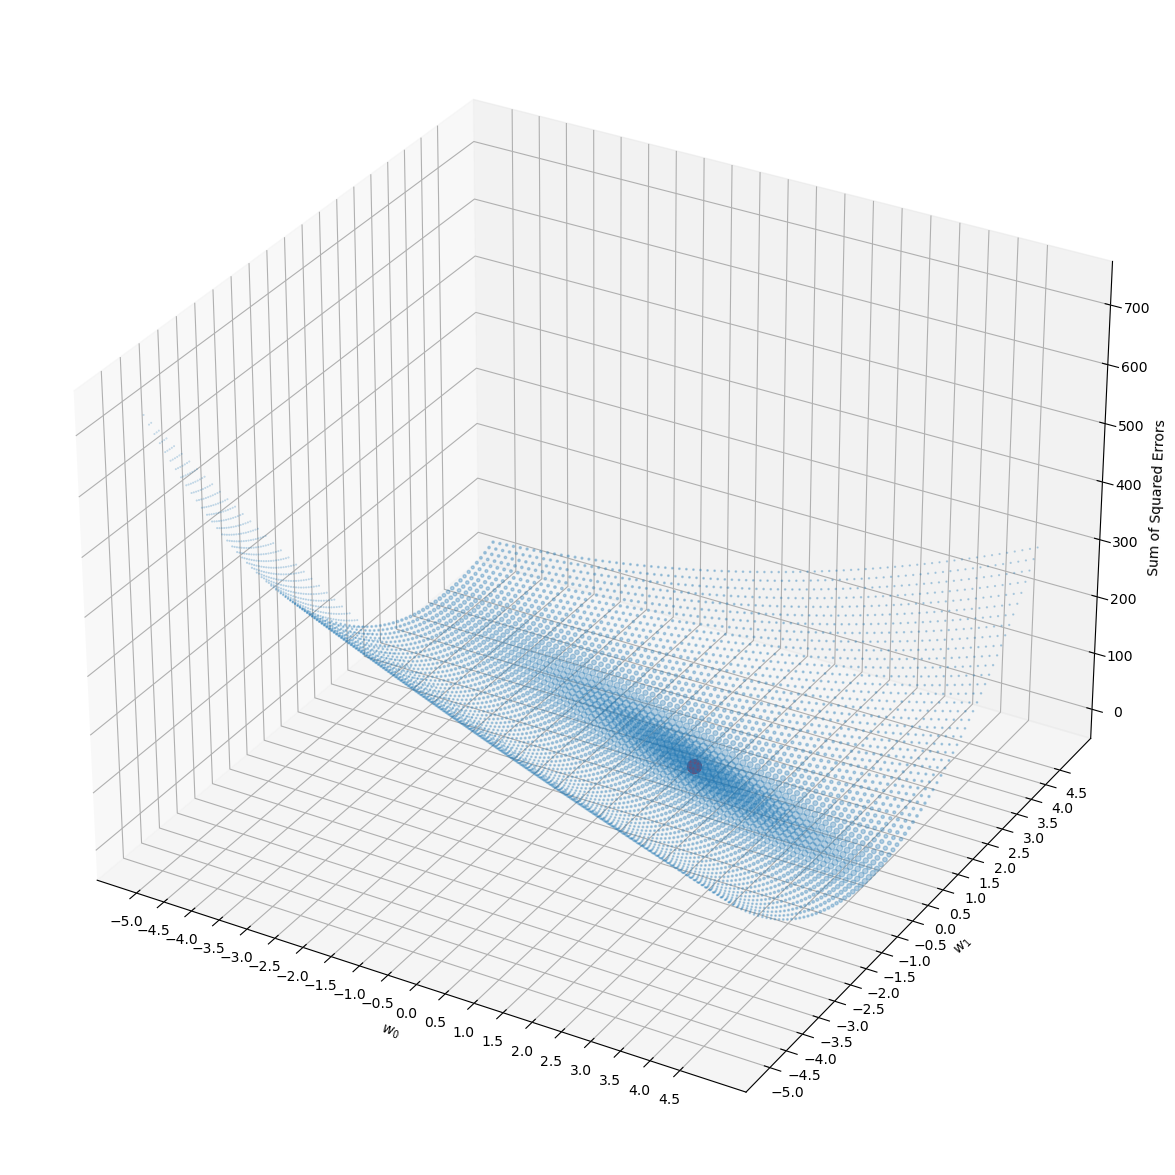

In [26]:
# Draw all attempted parameters and the corresponding errors.
# The larger the dot, the lower the error. And, the red dot is the final output.
x_data = full_log[:, 0] # w_0
y_data = full_log[:, 1] # w_1
z_data = full_log[:, 2] # sum of squared errors
ax = plt.figure(figsize=(15, 15)).add_subplot(projection='3d')
ax.scatter3D(x_data, y_data, z_data, s=100/(z_data+1), alpha=0.3)
ax.scatter3D(best_W[0], best_W[1], best_sum_sqr_err, s=100/(best_sum_sqr_err+1), color='red')
ax.set_xticks(np.arange(-5, 5, 0.5))
ax.set_yticks(np.arange(-5, 5, 0.5))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8
})
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel(r'Sum of Squared Errors')

Please try the plotting in a Python console and play with the interactive figure. You will observe that the red dot is at the bottom of the scattered surface, and no other dots are lower than it. The surface, on the other hand, illustrates the subspace of candidates in which the search was conducted. It needs to be emphasized that when "*searching in a space*", not only the input domain, e.g. $\mathbb{R}^2$ in our example, participates in the meaning of "space", but also, and more importantly, the values of the objective function corresponding to the inputs.

The search above accessed every candidate pair of parameters in consideration, and finally found the best ones, $w_0=0.98$ and $w_1=0.98$, which are very close to the optimality. However, there are several critical issues:
- (1) The boundaries of the range for search are derived from a mere assumption. If we assumed the range to be, for example, $[10, 100]$, then it is certain that the optimality would be missed. In addition, theoretically, the range s.t. no missing happens should be $(-\infty, \infty) \subset \mathbb{R}$, and every value in the range is a candidate.
- (2) The choice of the search stride is rather haphazard. Small strides will significantly increase the workload of the search, while large strides may lead to the missing of good candidates.
- (3) The time complexity of the search is primarily affected by the number of candidates. And, thus, the search may not be efficient if the amount of candidates is too large.

An ideal search, therefore, should be performed on a subspace of candidates of a reasonable size. This is a general goal of designing algorithms to solve optimization problems.

### 3.6 Solve Least Squares by Gradient Descent

The intuition of *gradient descent* is straightforward. Please imagine that the surface in the above figure is materialized in the real world. If we put a bead onto the surface, at any position except the red dot, with no push, and let it go freely, then naturally the bead will be rolling down and pass through the bottom, i.e. the red dot. And, it is certain that the bead will never miss the bottom. Further, even without any mathematical proof, it is reasonable to believe that the path of its rolling, from the start position to the bottom, is the shortest path on the surface. **Gradient descent** is an approach guiding the search of local minima to follow such shortest paths.

Let's dig this intuition a bit deeper. Consider the function: $f(x) = 2 (x - 3)^2 + 1$, where $x \in \mathbb{R}$. It is straightforward that the derivative is: $\frac{df(x)}{dx} = 4x - 12$. The problem is to seek the minimum of $f(x)$ and the corresponding $x_m$, given an arbitrary starting $x_0$. W.r.t. this particular problem, there is no major difficulty in finding $x_m = 3$ (<ins>*Exercise*</ins>: Convince yourself that this is true, and the figure below can help.). We concentrate on the relationships between every $x_i$ to be examined, $\frac{df(x_i)}{dx}$ and $x_m$, in finding $x_m$. W.l.o.g., we consider two different starting cases:
- (1) $x_0 = -5$
- (2) $x_0 = 8$

Our plan is to start with the starting point and then iteratively approach the min point. To implement this plan, three questions have to be answered in each iteration, i.e. at each step in approaching the optimum:
- (1) What "direction" we should move toward;
- (2) How far we should move;
- (3) Should we stop and return.

W.r.t. the first question, we observed (in the figure below) that, at any point $x_i$, if the derivative, $\frac{df(x_i)}{dx}$, is *positive*, then we should move to the *left*, i.e. toward $- \infty$ along the x-axis; otherwise, if $\frac{df(x_i)}{dx}$ is *negative*, then move to the *right*. For example, in the initial iteration, if we are at $x_0 = -5$, we should move to the right to approach $x_m$, and if we are at $x_0 = 8$, we should move to the left. 

W.r.t. the second question, the simplest idea is to set the stride of each move to a constant value, e.g. $1$. For example, if we start with $x_0 = -5$, and we do know that we need to move to the right, then $x_1 = -5 + 1$, where "$+$" indicates "moving to the right" and "$1$" is the stride.

W.r.t. the third question, an intuitive and simple idea is that we terminate the search and return $x_k$ if we observe no improvement when moving one more step (i.e. $k+1$) forward, or the total number of iterations hits a predetermined upper bound.

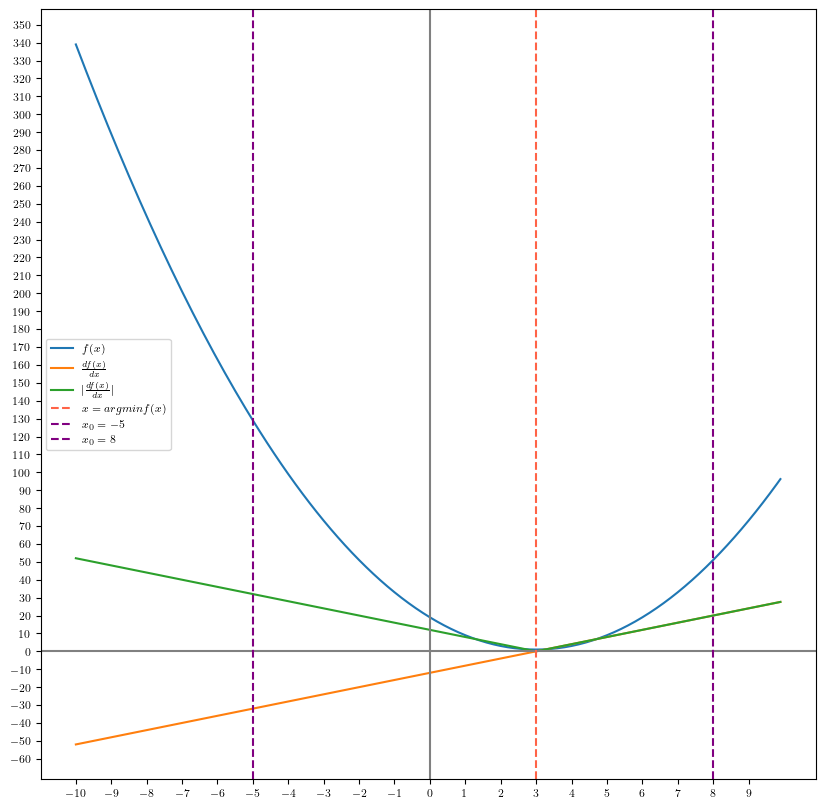

In [27]:
xticks = np.arange(-10, 10, 0.1)
f_x = 2 * (xticks - 3) ** 2 + 1
df_x = 4 * xticks - 12
abs_df_x = np.abs(df_x)

ax = plt.figure(figsize=(10,10)).add_subplot()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8
})
ax.plot(xticks, f_x, label=r'$f(x)$')
ax.plot(xticks, df_x, label=r'$\frac{df(x)}{dx}$')
ax.plot(xticks, abs_df_x, label=r'$|\frac{df(x)}{dx}|$')
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-60, 360, 10))
ax.axhline(0, color='grey')
ax.axvline(0, color='grey')
ax.axvline(3, color='tomato', ls='--', label=r'$x=argmin f(x)$')
ax.axvline(-5, color='purple', ls='--', label=r'$x_0=-5$')
ax.axvline(8, color='purple', ls='--', label=r'$x_0=8$')
ax.legend()

Based on the above ideas in addressing the three questions, we propose the first algorithm, **Algorithm GD-1**:

<ins>*NOTE*</ins>: **Algorithm GD-1** is not exactly the *Gradient Decent* algorithm but a naively simplified version. It is the prologue of our discussion of *Gradient Decent*. We will discuss its issues and refine it step by step till the real *Gradient Decent* algorithm is developed.

>**Algorithm: GD-1**
>- **Given**:
>    - A differentiable function $f: \mathbb{R} \rightarrow \mathbb{R}$ which is NOT monotonically decreasing;
>    - A start point $x_0 \in \mathbb{R}$;
>    - A real number $s>0$ as the stride;
>    - A maximum number of iterations, $N > 0$.
>- **Seek**: $x_m \in \mathbb{R}$ s.t. $f(x_m) \leq f(x)$ for all $x \in \mathbb{R}$.
>- **Steps**:
>    - LET $x_m = x_0$
>    - LET $x_c = x_m$
>    - WHILE:
>        - IF $\frac{df(x_c)}{dx} = 0$:
>            - RETURN $x_m$ 
>        - $x_c = x_m$

In [28]:
samples = np.arange(-5, 5, 0.1)
W_mesh_0, W_mesh_1 = np.meshgrid(samples, samples)
W_mesh_0.shape, W_mesh_1.shape

((100, 100), (100, 100))

In [29]:
W_mesh = np.asarray([[[W_mesh_0[i][j], W_mesh_1[i][j]] for j in range(W_mesh_0.shape[1])] for i in range(W_mesh_0.shape[0])])
W_mesh.shape

(100, 100, 2)

In [30]:
SSR_mesh = np.sum((Y - np.einsum('ij, kli->klj', X_ext, W_mesh)) ** 2, axis=2)
SSR_mesh.shape

(100, 100)

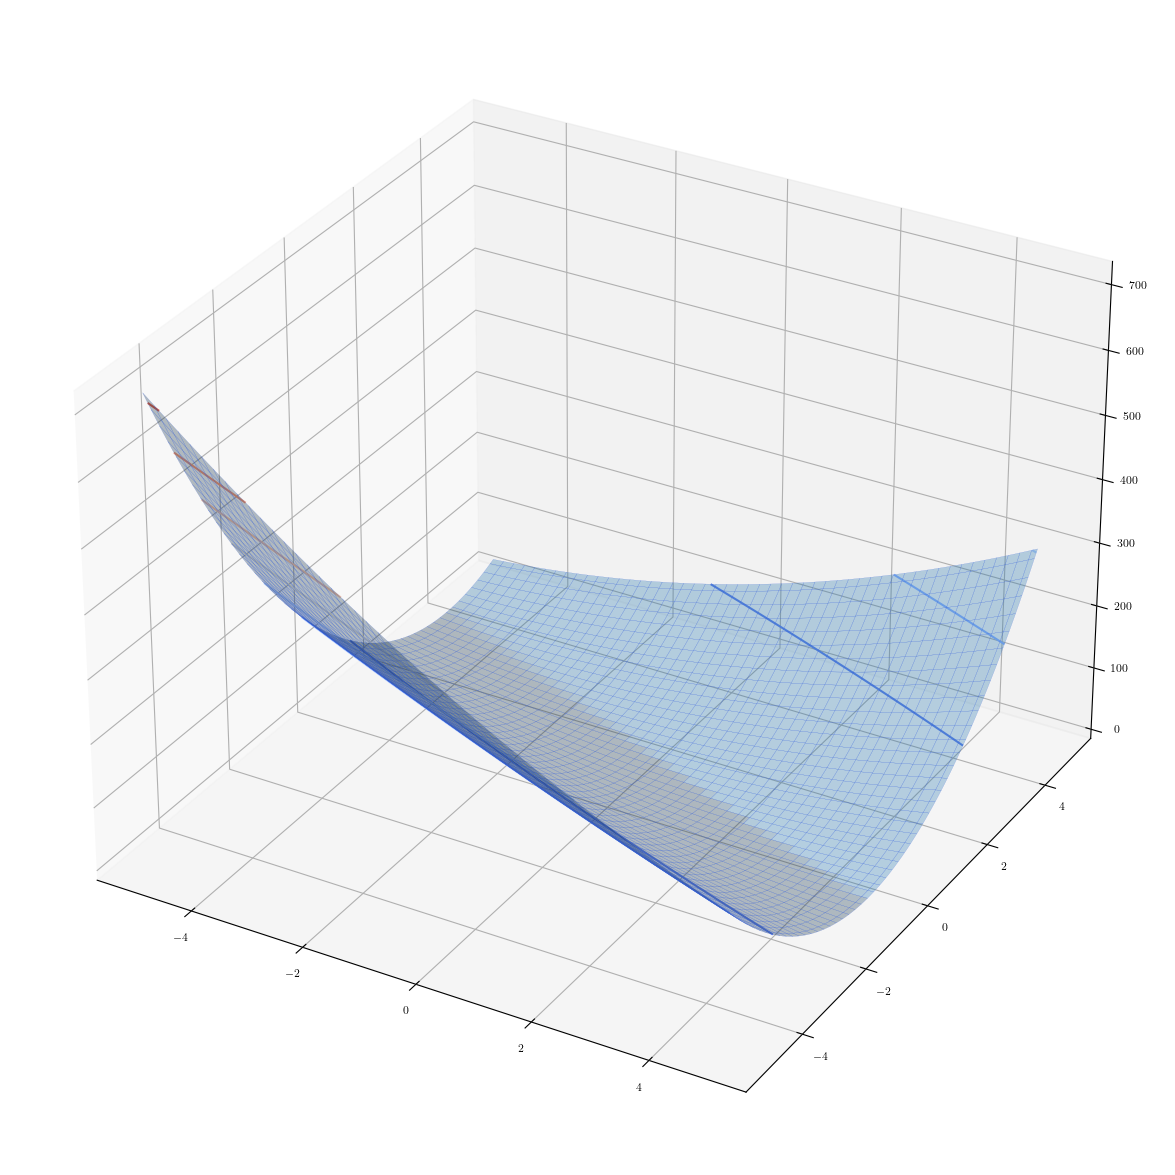

In [31]:
ax = plt.figure(figsize=(15, 15)).add_subplot(projection='3d')
ax.plot_surface(W_mesh_0, W_mesh_1, SSR_mesh, edgecolor='royalblue', lw=0.1, alpha=0.3)
ax.contour(W_mesh_0, W_mesh_1, SSR_mesh, cmap='coolwarm')